# Analysis of metrology

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("reportInserts.csv")
df2 = pd.read_csv("reportInserts-v2.csv")

In [69]:
print(df.keys())

Index(['label', 'angle', 'planeity'], dtype='object')


In [ ]:
df[""]

## Angles of inserts

Text(0.5, 0, 'angle [degrees]')

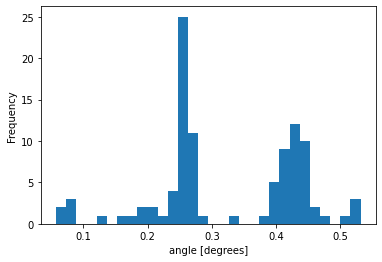

In [29]:
ax = df["angle"].plot(kind="hist",bins=30)
ax.set_xlabel("angle [degrees]")

In [30]:
df[df["angle"]>0]["angle"].mean()

0.3219169696969697

# Comparison of the 2 measurements

0.003979050520246213

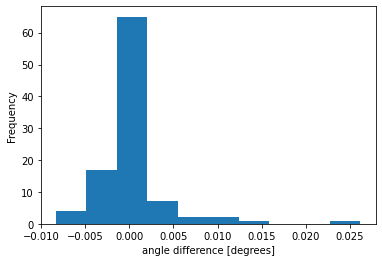

In [47]:
diff = df.compare(df2)["angle"]["self"]-df.compare(df2)["angle"]["other"]
#plt.plot(diff,kind="hist",bins=10)
ax = diff.plot(kind="hist")
ax.set_xlabel("angle difference [degrees]")
diff.mean()
diff.std()

In [23]:
#df[df["angle"]>0.35]

0.2549361363636364
0.014710050861675008


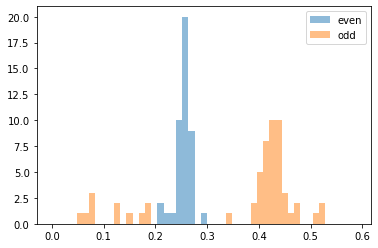

In [8]:


def oddModule():
    out=""
    labels = ["(df['label'].str.find('{}')>=0)".format(i) for i in ["02","04","06","08","10"]]
    return "|".join(labels)

def evenModule():
    out=""
    labels = ["(df['label'].str.find('{}')>=0)".format(i) for i in ["01","03","05","07","09","11"]]
    return "|".join(labels)

#df[(df['label'].str.find("04")>=0)]["angle"].plot(kind="hist")
even = df[(eval(oddModule()))]["angle"]
odd = df[(eval(evenModule()))]["angle"]
print(even.mean())
print(even.std())
ax = plt.hist(even,bins=[0.012*i for i in range(50)],alpha=0.5,label="even")
#ax[0].set_xlabel("angle [degrees]")
plt.hist(odd,bins=[0.012*i for i in range(50)],alpha=0.5,label="odd")
plt.legend()

# Comparison between the 2 measurements

0.0026534385236193646

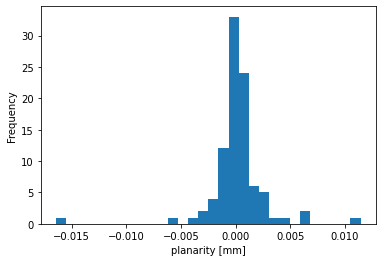

In [46]:
diff = df.compare(df2)["planeity"]["self"]-df.compare(df2)["planeity"]["other"]
#plt.plot(diff,kind="hist",bins=10)
ax = diff.plot(kind="hist",bins=30)
ax.set_xlabel("planarity [mm]")
diff.mean()
diff.std()

## Planeity of inserts

Text(0.5, 0, 'planarity [mm]')

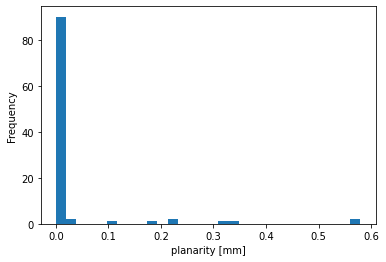

In [9]:
ax = df["planeity"].plot(kind="hist",bins=30)
ax.set_xlabel("planarity [mm]")

In [11]:
df[df["planeity"]>0.1]

,label,angle,planeity
18,A03F,0.05747,0.10137
20,B03F,0.12898,0.33395
21,B03H,0.07386,0.57977
22,C03F,0.12501,0.22459
26,E03F,0.07722,0.32700
27,E03H,0.07017,0.56141
38,A05F,0.08312,0.18813
42,C05F,0.15490,0.22208


In [13]:
df[df["planeity"]<0.1].mean()

angle       0.339056
planeity    0.005594
dtype: float64

Text(0.5, 0, 'planarity [mm]')

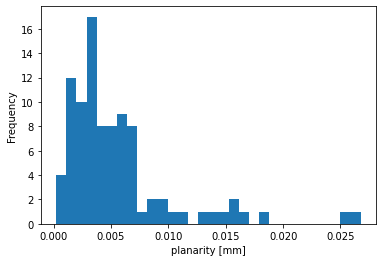

In [14]:
ax = df[df["planeity"]<0.1]["planeity"].plot(kind="hist",bins=30)
ax.set_xlabel("planarity [mm]")

In [98]:
ax2 =((df['label'].str.endswith("S")==False)&(df['label'].str.endswith("E")==False))["planeity"].plot(kind="hist")
ax2.set_xlabel("planeity [mm]")


KeyError: 'planeity'

# Module planarity

Text(0.5, 0, 'angle [degrees]')

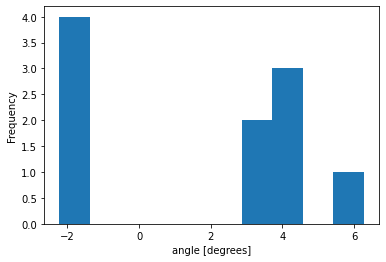

In [59]:
dfm = pd.read_csv("reportModule.csv")
dfm2 = pd.read_csv("reportModule-v2.csv")
ax = dfm["angle"].plot(kind="hist",bins=10)
ax.set_xlabel("angle [degrees]")


Text(0.5, 0, 'planeity [mm]')

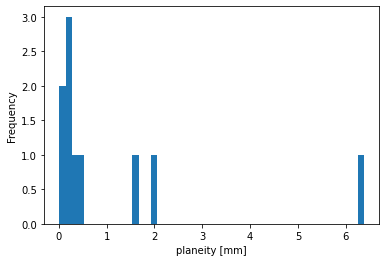

In [60]:
ax = dfm["planeity"].plot(kind="hist",bins=50)
ax.set_xlabel("planeity [mm]")

In [61]:
dfm[dfm["planeity"]>1]

,label,angle,planeity
0,E01,3.01178,6.37477
4,E05,4.55253,1.63316
5,E07,4.42051,1.93747


Text(0.5, 0, 'planeity [mm]')

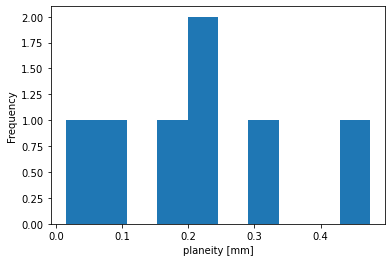

In [62]:
ax = dfm[dfm["planeity"]<1]["planeity"].plot(kind="hist",bins=10)
ax.set_xlabel("planeity [mm]")

# Comparison between the 2 measurements

      self    other
0  6.37477  6.34767
1  0.01417  0.00530
2  0.47521  0.29701
3  0.23269  0.23382
4  1.63316  1.67081
5  1.93747  1.94706
6  0.09959  0.07874
7  0.16453  0.16908
8  0.22465  0.22364
9  0.33209  0.32914


0.058767346980369214

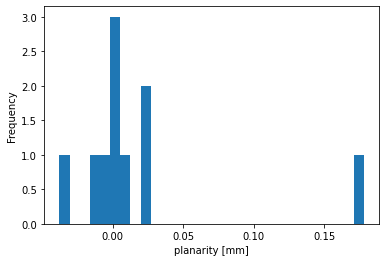

In [66]:
diff = dfm.compare(dfm2)["planeity"]["self"]-dfm.compare(dfm2)["planeity"]["other"]
print(dfm.compare(dfm2)["planeity"])
#plt.plot(diff,kind="hist",bins=10)
ax = diff.plot(kind="hist",bins=30)
ax.set_xlabel("planarity [mm]")
diff.mean()
diff.std()

## Holes positions

In [65]:
dfh = pd.read_csv("Proto2/Holes.csv",";")

In [44]:
print(dfh.keys())
dfh

Index(['Module', 'A-x', 'A-y', 'B-x', 'B-y', 'C-x', 'C-y', 'D-x', 'D-y'], dtype='object')


,Module,A-x,A-y,B-x,B-y,C-x,C-y,D-x,D-y
0,4,0,0,0,102.93,93.02,102.83,93.01,0.07
1,8,0,0,0,103.01,93.02,102.91,92.98,0.06
2,9,0,0,0,102.96,93.02,102.85,92.99,0.05
3,5,0,0,0,102.90,92.97,103.01,92.97,0.12


## Entraxe A-B  C-D

<AxesSubplot:ylabel='Frequency'>

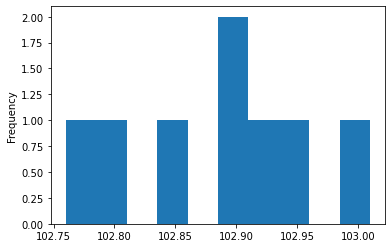

In [45]:
(dfh["B-y"]-dfh["A-y"]).append(dfh["C-y"]-dfh["D-y"]).plot(kind="hist")

mean =  102.8875
stdev =  0.08241879119992747


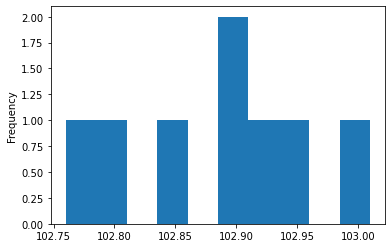

In [61]:
a = (dfh["B-y"]-dfh["A-y"]).append(dfh["C-y"]-dfh["D-y"])
a.plot(kind="hist")
print("mean = ",a.mean())
print("stdev = ",(a.std()))

mean =  92.9975
stdev =  0.022519832529190965


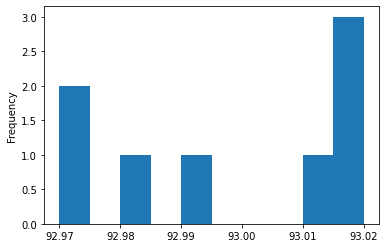

In [60]:
a = (dfh["D-x"]-dfh["B-x"]).append(dfh["C-x"]-dfh["A-x"])
a.plot(kind="hist")
print("mean = ",a.mean())
print("stdev = ",(a.std()))